In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use(['science', 'nature'])

In [8]:
data1 = pd.read_csv("results/isolet.csv")
data1["epoch"] = 1
data2 = pd.read_csv("results/isolet.csv")
data2["epoch"] = 10
isolet_hdc = pd.concat((data1, data2), ignore_index=True)

In [9]:
data1 = pd.read_csv("results/language.csv")
data1["epoch"] = 1
data2 = pd.read_csv("results/language.csv")
data2["epoch"] = 10
language_hdc = pd.concat((data1, data2), ignore_index=True)

In [10]:
data1 = pd.read_csv("results/mnist.csv")
data1["epoch"] = 1
data2 = pd.read_csv("results/mnist.csv")
data2["epoch"] = 10
mnist_hdc = pd.concat((data1, data2), ignore_index=True)

In [11]:
colors = sns.light_palette("#04724D", n_colors=3)
colors += sns.dark_palette("#04724D", n_colors=3, reverse=True)[1:]
colors


[(0.916517823934696, 0.9524116263780315, 0.9323263481002249),
 (0.4643357128508286, 0.6987443371049988, 0.6159075552975899),
 (0.01568627450980392, 0.4470588235294118, 0.30196078431372547),
 (0.07488102960691531, 0.2990518523396474, 0.2216764966251395),
 (0.13361332567983053, 0.15220118561230297, 0.1420194299341206)]

[]

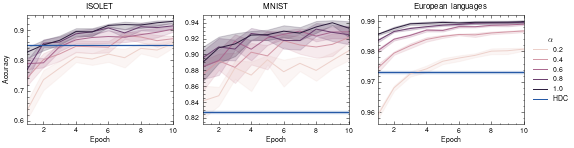

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.9, 2.0))

isolet = pd.read_csv("results/isolet-with-buffer.csv")
isolet.resources = (isolet.resources * 10).round() / 10
isolet = isolet[(isolet.resources == 0.2) | (isolet.resources == 0.4) | (isolet.resources == 0.6) | (isolet.resources == 0.8) | (isolet.resources == 1.0)]
mnist = pd.read_csv("results/mnist-with-buffer.csv")
mnist.resources = (mnist.resources * 10).round() / 10
mnist = mnist[(mnist.resources == 0.2) | (mnist.resources == 0.4) | (mnist.resources == 0.6) | (mnist.resources == 0.8) | (mnist.resources == 1.0)]
language = pd.read_csv("results/language-with-buffer.csv")
language.resources = (language.resources * 10).round() / 10
language = language[(language.resources == 0.2) | (language.resources == 0.4) | (language.resources == 0.6) | (language.resources == 0.8) | (language.resources == 1.0)]

# colors = ["#F7DDA1", "#C6BA6C", "#829051", "#3B5936", "#023B27"]
colors = None


sns.lineplot(x="epoch", y="accuracy", hue="resources", data=isolet, ax=ax1, palette=colors)
sns.lineplot(x="epoch", y="accuracy", data=isolet_hdc, ax=ax1, color="#2659A6", label="HDC")
ax1.set_xlim(1, 10)
# ax1.set_ylim(0.6, 1)
ax1.set_title("ISOLET", fontsize=8)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.get_legend().remove()

sns.lineplot(x="epoch", y="accuracy", hue="resources", data=mnist, ax=ax2, palette=colors)
sns.lineplot(x="epoch", y="accuracy", data=mnist_hdc, ax=ax2, color="#2659A6", label="HDC")
ax2.set_xlim(1, 10)
# ax2.set_ylim(0.6, 1)
ax2.set_title("MNIST", fontsize=8)
ax2.set_xlabel("Epoch")
ax2.set_ylabel(None)
ax2.get_legend().remove()

sns.lineplot(x="epoch", y="accuracy", hue="resources", data=language, ax=ax3, palette=colors)
sns.lineplot(x="epoch", y="accuracy", data=language_hdc, ax=ax3, color="#2659A6", label="HDC")
ax3.set_xlim(1, 10)
# ax3.set_ylim(0.6, 1)
ax3.set_title("European languages", fontsize=8)
ax3.set_xlabel("Epoch")
ax3.set_ylabel(None)
legend = ax3.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", title="$\\alpha$")
plt.setp(legend.get_title(), fontsize=7)

plt.savefig("with-gradient.pgf")
plt.savefig("with-gradient.png", dpi=300)
plt.plot()